# Treasury Squeeze raw score data(With the first two attributes)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.23.2.


In [2]:
trea = pd.read_csv("/Users/gaojinglun/Desktop/IE517/HW1/Treasury Squeeze raw score data.csv")
# drop the first two columns in the original data
TS_data = trea.drop(trea.columns.values[:2], axis = 1)
TS_data.head()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [3]:
X_ts, y_ts = TS_data[TS_data.columns.values[:-1]], TS_data['squeeze']
print(X_ts.shape, y_ts.shape)
# print the first row of X_ts
print(X_ts.iloc[0])
# print the first row of y_ts
print(y_ts.iloc[0])

(900, 9) (900,)
price_crossing      0.157659
price_distortion    0.900783
roll_start          0.016053
roll_heart          1.000000
near_minus_next     1.000000
ctd_last_first      0.902811
ctd1_percent        1.000000
delivery_cost       0.010743
delivery_ratio      0.099313
Name: 0, dtype: float64
True


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X, y = X_ts[X_ts.columns.values[:2]], y_ts
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
#(675, 2) (675,)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(675, 2) (675,)


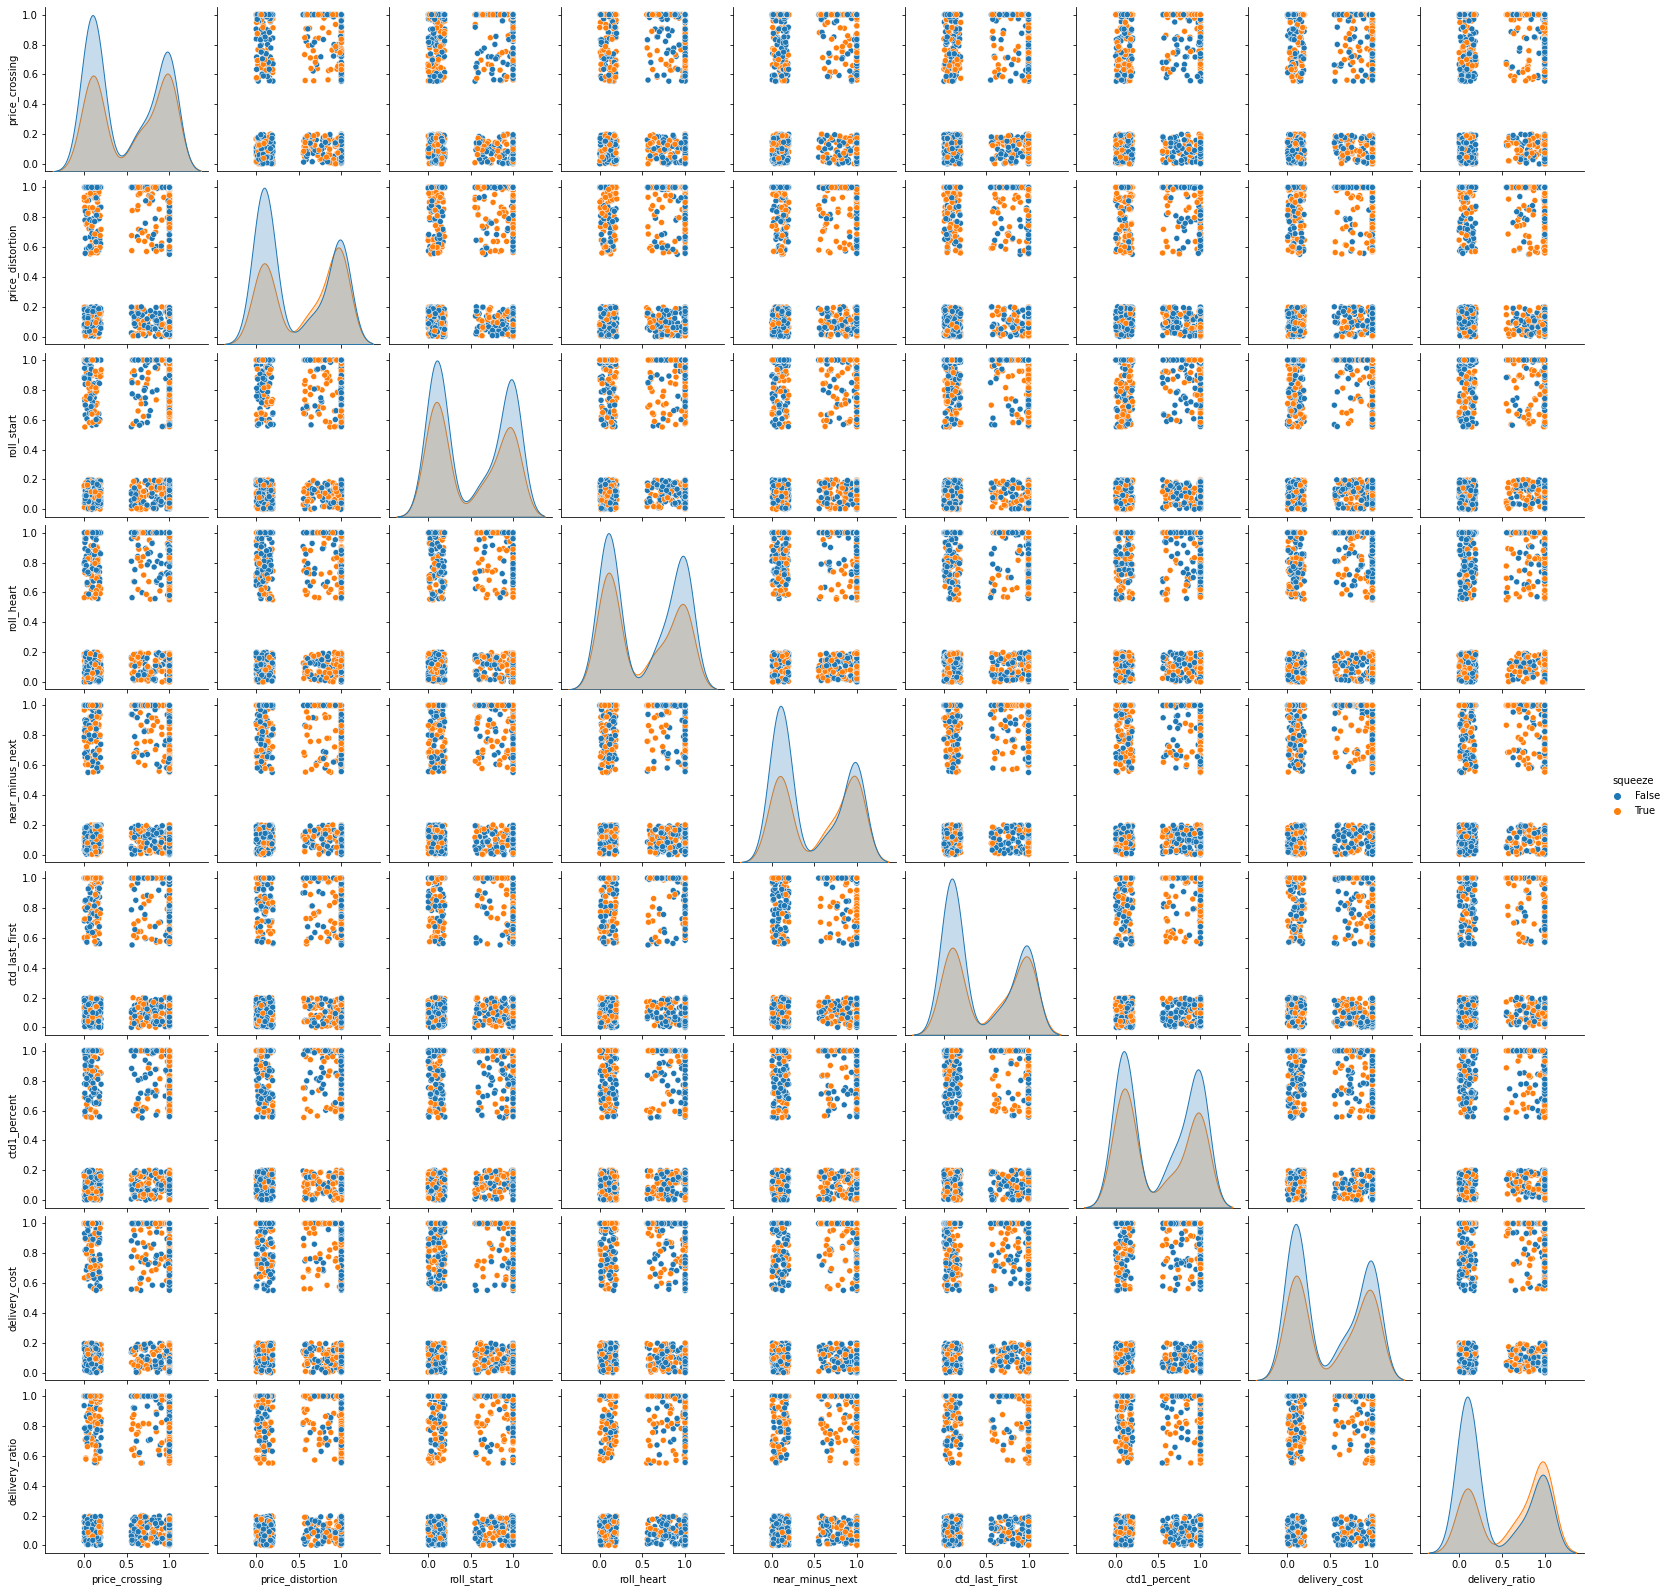

In [5]:
# Pairsplot of the nine features
sns.pairplot(TS_data, hue = 'squeeze')
plt.show()

In [6]:
#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [7]:
print( clf.coef_)

print( clf.intercept_)

[[-0.2329688   0.01171791]]
[-1.03447785]


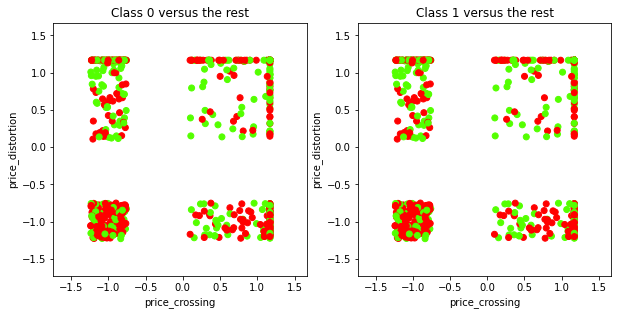

In [8]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

Xs = np.arange(x_min, x_max, 0.5)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 6)
for i in [0, 1]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('price_crossing')
    axes[i].set_ylabel('price_distortion')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_ - Xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
    plt.plot(Xs, ys)

In [9]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]

[False]
[-3.30985417]


In [10]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.562962962962963


In [11]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.6044444444444445


In [12]:
print( metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

       False       0.60      1.00      0.75       136
        True       0.00      0.00      0.00        89

    accuracy                           0.60       225
   macro avg       0.30      0.50      0.38       225
weighted avg       0.37      0.60      0.46       225



/Users/gaojinglun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[136   0]
 [ 89   0]]


In [14]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
